# **Data Analysis Task: Building Energy Consumption**



*   Name  : Caleb Effendi
*   Email : calebeffendi.work@gmail.com




# **Import All the Libraries and Packages that are needed**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import re
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Cleaning**

**Gathering Data**

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Pinion/Building_Energy_Consumption_Data.xlsx")
df.head()

,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
0,1,2022,Industrial,4941,17874,50.91,Urban,83,229490100.0,Jawa Barat,24⁰ C,14300,3574
1,2,2023,Commercial,3677,37711,54.72,Urban,17,244641180.0,Jawa Barat,20⁰ C,30169,7542
2,3,2020,Commercial,1413,10539,84.15,Rural,85,256921980.0,Jawa Barat,22⁰ C,8432,2107
3,4,2022,Commercial,2031,58351,NaN,Urban,78,150017140.0,Jawa Barat,18⁰ C,46681,11670
4,5,2022,Commercial,1713,66267,65.95,Suburban,73,147403340.0,Jawa Barat,18⁰ C,53014,13253


**Assessing the Data**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Building_ID                        100 non-null    int64  
 1   Year                               100 non-null    int64  
 2   Building_Type                      100 non-null    object 
 3   Floor_Area (m²)                    100 non-null    int64  
 4   Energy_Consumption (kWh)           100 non-null    int64  
 5   Occupancy_Rate (%)                 92 non-null     float64
 6   Region                             100 non-null    object 
 7   Energy_Score                       100 non-null    int64  
 8   Energy_Cost (IDR)                  100 non-null    float64
 9   Province                           100 non-null    object 
 10  Average_Temp                       100 non-null    object 
 11  Energy_Consumption_AC (kWh)        100 non-null    int64  


We can clearly see that the 'Occupancy Rate' column has 8 missing values, resulting in a total of 92 entries instead of 100.

We can verify this using the script below:

**Checking for Missing or Duplicate Data**

In [9]:
# Checking for duplicates
print("Number of duplicates: ", df.duplicated().sum())

print("\n")

# Checking for missing values
print("Number of NaN or Null values:")
print(df.isnull().sum())

Number of duplicates:  0


Number of NaN or Null values:
Building_ID                          0
Year                                 0
Building_Type                        0
Floor_Area (m²)                      0
Energy_Consumption (kWh)             0
Occupancy_Rate (%)                   8
Region                               0
Energy_Score                         0
Energy_Cost (IDR)                    0
Province                             0
Average_Temp                         0
Energy_Consumption_AC (kWh)          0
Energy_Consumption_Lighting (kWh)    0
dtype: int64


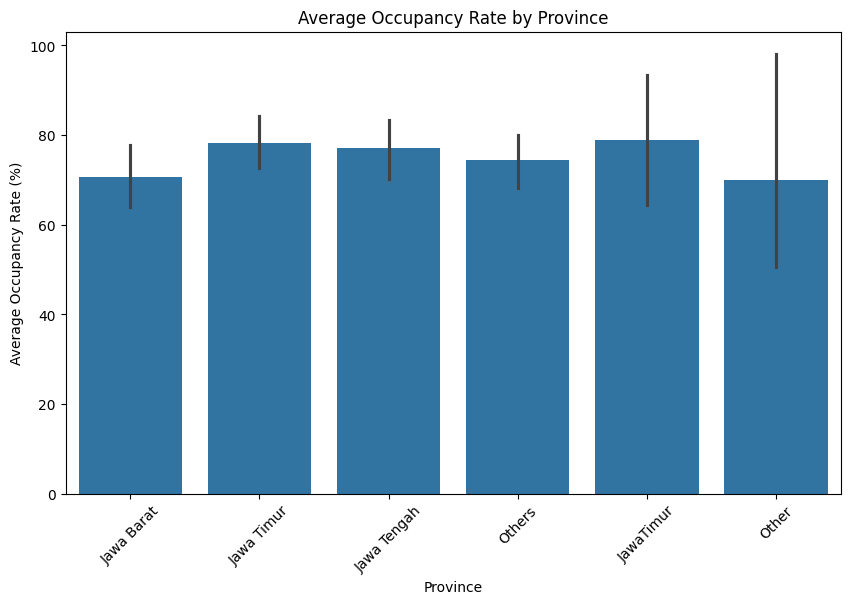

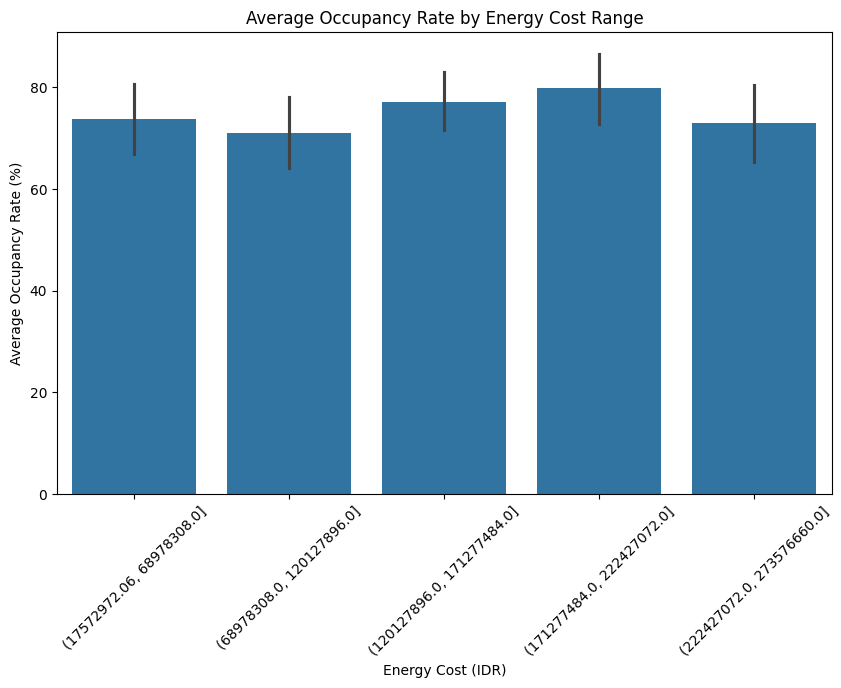

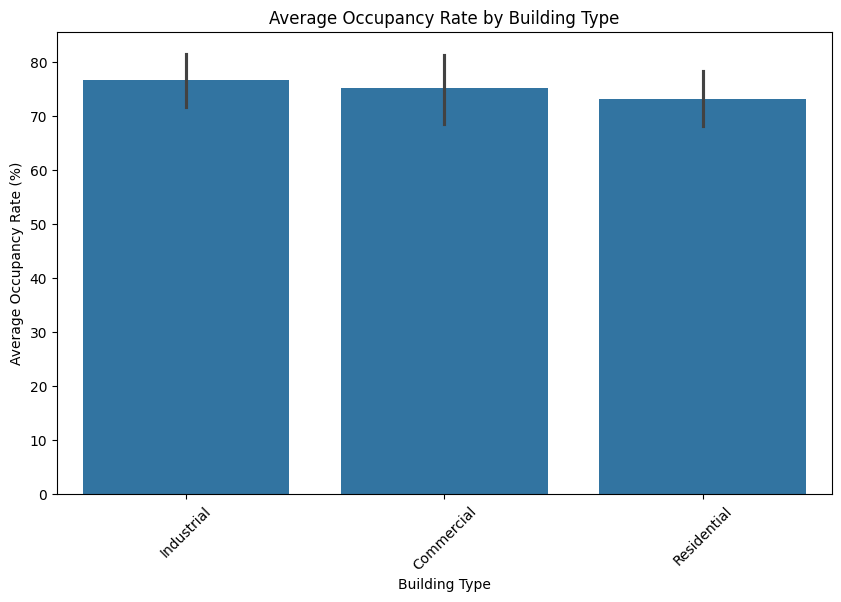

In [10]:
# Bar plot for Occupancy Rate vs Province
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Occupancy_Rate (%)', data=df, estimator=np.mean)
plt.title('Average Occupancy Rate by Province')
plt.ylabel('Average Occupancy Rate (%)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.show()

# Create a new column for Energy Cost ranges for better grouping
df['Energy_Cost_Range'] = pd.cut(df['Energy_Cost (IDR)'], bins=5)

# Bar plot for Occupancy Rate vs Energy Cost range
plt.figure(figsize=(10, 6))
sns.barplot(x='Energy_Cost_Range', y='Occupancy_Rate (%)', data=df, estimator=np.mean)
plt.title('Average Occupancy Rate by Energy Cost Range')
plt.ylabel('Average Occupancy Rate (%)')
plt.xlabel('Energy Cost (IDR)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Occupancy Rate vs Building Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Building_Type', y='Occupancy_Rate (%)', data=df, estimator=np.mean)
plt.title('Average Occupancy Rate by Building Type')
plt.ylabel('Average Occupancy Rate (%)')
plt.xlabel('Building Type')
plt.xticks(rotation=45)
plt.show()

**Fill Missing Data with Median**

As shown in the bar plot above, there are no clear patterns between Occupancy Rate and Province, Occupancy Rate and Energy Cost, or Occupancy Rate and Building Type. Additionally, we notice two categories for the same Province ("Jawa Timur" and "JawaTimur"), indicating that further tidying up is needed in the next step. In this context, filling the missing data with the median is a suitable choice. The median is more resilient and less sensitive to large outliers compared to the mean. Furthermore, using the median helps prevent significant skewing of the data distribution, ensuring a more accurate representation of the central tendency.

In [11]:
# Fill missing values with the median of Occupancy Rate

df['Occupancy_Rate (%)'].fillna(df['Occupancy_Rate (%)'].median(), inplace=True)

In [12]:
# Checking for missing values again
print("Number of NaN or Null values:")
print(df.isnull().sum())

Number of NaN or Null values:
Building_ID                          0
Year                                 0
Building_Type                        0
Floor_Area (m²)                      0
Energy_Consumption (kWh)             0
Occupancy_Rate (%)                   0
Region                               0
Energy_Score                         0
Energy_Cost (IDR)                    0
Province                             0
Average_Temp                         0
Energy_Consumption_AC (kWh)          0
Energy_Consumption_Lighting (kWh)    0
Energy_Cost_Range                    0
dtype: int64


Now we can see that all the missing values has been filled

**Cleaning the Average Temperature Column**

Since the temperature column contains both Celsius and Fahrenheit units, we first convert all Fahrenheit values to Celsius, then remove the degree symbol and units from the rows. This allows us to convert the strings to floats, making the data analysis process easier.

In [13]:
# Function to convert Fahrenheit to Celsius
def fahrenheitToCelcius(f_temp):
    return (f_temp - 32) * 5.0 / 9.0

# Function to clean the 'Average_Temp' column
def cleanAvgTemp(df):
    column = 'Average_Temp'

    df[column] = df[column].astype(str)

    df['Temp_Value'] = df[column].str.extract(r'(\d+\.?\d*)').astype(float)
    df['Temp_Unit'] = df[column].str.extract(r'([CF])')

    df['Temp_Value'] = df.apply(lambda row: fahrenheitToCelcius(row['Temp_Value'])
                                if row['Temp_Unit'] == 'F' else row['Temp_Value'], axis=1)

    df[column] = df['Temp_Value']

    df.drop(['Temp_Value', 'Temp_Unit'], axis=1, inplace=True)

    return df

df_cleaned = cleanAvgTemp(df)
df_cleaned[['Building_ID', 'Average_Temp']].head()

,Building_ID,Average_Temp
0,1,24.0
1,2,20.0
2,3,22.0
3,4,18.0
4,5,18.0


In [14]:
rows_to_check = [11, 20, 32, 33, 46, 77, 80]
df_cleaned.loc[rows_to_check, ['Building_ID', 'Average_Temp']]

,Building_ID,Average_Temp
11,12,0.000000
20,21,22.222222
32,33,0.000000
33,34,22.222222
46,47,0.000000
77,78,22.222222
80,81,22.222222


The 'Average Temperature' column has been fully converted to Celsius, and the degree symbol and units have been removed.

We can also see that in the Province column from the bar plot above, some entries don't have spaces in the names, such as 'JawaTimur' instead of 'Jawa Timur. So we can create a function to add spaces to these entries.

In [15]:
# Function to standardize and clean the 'Province' column correctly
def standardName(df_cleaned):
    # Ensure proper spacing between words like "Jawa Timur"
    df_cleaned['Province'] = df_cleaned['Province'].str.replace(r'(?<=[a-zA-Z])(?=[A-Z])', ' ', regex=True).str.strip()

    # Standardize 'Other' and 'Others' variations
    df_cleaned['Province'] = df_cleaned['Province'].replace({'Other': 'Others'})

    return df_cleaned

# Apply the cleaning function
df_cleaned1 = standardName(df_cleaned)

# Verify the number of entries for each category in the 'Province' column after cleaning
jawa_timur_count = df_cleaned1[df_cleaned1['Province'] == 'Jawa Timur'].shape[0]
jawa_barat_count = df_cleaned1[df_cleaned1['Province'] == 'Jawa Barat'].shape[0]
jawa_tengah_count = df_cleaned1[df_cleaned1['Province'] == 'Jawa Tengah'].shape[0]
others_count = df_cleaned1[df_cleaned1['Province'] == 'Others'].shape[0]

print(f"The number of entries for 'Jawa Timur' is: {jawa_timur_count}") # It should be 26
print(f"The number of entries for 'Jawa Barat' is: {jawa_barat_count}") # It should be 23
print(f"The number of entries for 'Jawa Tengah' is: {jawa_tengah_count}") # It should be 18
print(f"The number of entries for 'Others' is: {others_count}") # It should be 33

The number of entries for 'Jawa Timur' is: 26
The number of entries for 'Jawa Barat' is: 23
The number of entries for 'Jawa Tengah' is: 18
The number of entries for 'Others' is: 33


In [16]:
# Print the unique values in the 'Province' column to identify inconsistencies
unique_provinces = df_cleaned1['Province'].unique()

print("Unique values in the 'Province' column:")
print(unique_provinces)

Unique values in the 'Province' column:
['Jawa Barat' 'Jawa Timur' 'Jawa Tengah' 'Others']


In [17]:
rows_to_check = [95, 96, 97, 98, 99]
# rows_to_check = [83, 84]
df_cleaned1.loc[rows_to_check, ['Building_ID', 'Province']]

,Building_ID,Province
95,96,Jawa Timur
96,97,Jawa Timur
97,98,Others
98,99,Others
99,100,Others


# **Check for Outliers**

In [18]:
# Function to detect outliers
def detect_outliers_column(df_cleaned1, column):
    Q1 = df_cleaned1[column].quantile(0.25)
    Q3 = df_cleaned1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned1[(df_cleaned1[column] < lower_bound) | (df_cleaned1[column] > upper_bound)]

    if not outliers.empty:
        print(outliers[['Building_ID', 'Year', 'Building_Type', column]])
    else:
        print(f"There are no outliers in {column}")

**Detecting All the Outliers for Each Numeric Columns**

Since not all columns are numeric and certain numeric columns, like 'Building ID' and 'Year', don't have meaningful outliers, we will focus on checking the outliers in specific relevant columns only, which is:


*  Floor Area
*  Energy Consumption
*  Energy Cost
*  Energy Score
*  Average Temp
*  Energy Consumption AC
*  Energy Consumption Lighting






In [19]:
# Detect outliers for Floor Area column
detect_outliers_column(df_cleaned1, 'Floor_Area (m²)')

    Building_ID  Year Building_Type  Floor_Area (m²)
6             7  2020    Commercial            -2088
25           26  2021   Residential            -1903


In [20]:
# Detect outliers for Energy Consumption column
detect_outliers_column(df_cleaned1, 'Energy_Consumption (kWh)')

    Building_ID  Year Building_Type  Energy_Consumption (kWh)
82           83  2020    Industrial                   2000000


In [21]:
# Detect outliers for Energy Cost column
detect_outliers_column(df_cleaned1, 'Energy_Cost (IDR)')

There are no outliers in Energy_Cost (IDR)


In [22]:
# Detect outliers for Energy Score column
detect_outliers_column(df_cleaned1, 'Energy_Score')

There are no outliers in Energy_Score


In [23]:
# Detect outliers for Average Temperature column
detect_outliers_column(df_cleaned1, 'Average_Temp')

    Building_ID  Year Building_Type  Average_Temp
11           12  2022   Residential           0.0
32           33  2023    Industrial           0.0
46           47  2023   Residential           0.0


In [24]:
# Detect outliers for Energy Consumption AC column
detect_outliers_column(df_cleaned1, 'Energy_Consumption_AC (kWh)')

There are no outliers in Energy_Consumption_AC (kWh)


In [25]:
# Detect outliers for Energy Consumption Lighting column
detect_outliers_column(df_cleaned1, 'Energy_Consumption_Lighting (kWh)')

    Building_ID  Year Building_Type  Energy_Consumption_Lighting (kWh)
13           14  2022   Residential                              41252
17           18  2023   Residential                              49589
21           22  2020   Residential                              48206
22           23  2021   Residential                              45915
28           29  2023   Residential                              37635
36           37  2023   Residential                              42454
50           51  2022   Residential                              49089
55           56  2023   Residential                              39372
84           85  2022   Residential                              38995
95           96  2021   Residential                              41534


**Clean and Remove the Outliers**

We are only detecting outliers in specific columns: Floor Area, Energy Consumption, Average Temperature, and Energy Consumption Lighting. Therefore, we only need to remove or replace outliers in those specific columns.

For the Floor Area column, it seems there is a misinput of negative numbers. We assume that removing the negative sign for these rows is a reasonable correction.

In [26]:
# Replacing the outliers for the Floor Area column

# Function to remove negative signs on the Floor Area column
def removeNegativeSigns(df_cleaned1):
    column = 'Floor_Area (m²)'
    df_cleaned1[column] = df_cleaned1[column].apply(lambda x: abs(x) if x < 0 else x)
    return df_cleaned1

df_cleaned2 = removeNegativeSigns(df_cleaned1)
df_cleaned2[['Building_ID', 'Floor_Area (m²)']].head()

,Building_ID,Floor_Area (m²)
0,1,4941
1,2,3677
2,3,1413
3,4,2031
4,5,1713


To address the outliers in the Energy Consumption, Average Temperature, and Energy Consumption Lighting columns, we can apply the IQR method to cap the outliers. We choose this method because:


*  Limiting extreme values to a reasonable range is beneficial because, instead of removing the data, it allows us to retain valuable information while capping outliers to avoid skewing the results
*   Limiting extreme values ensures that it reduces the influence of extreme values on statistical analyses like mean, standard deviation, and regression
*   In many business cases (e.g., energy consumption), outliers often represent unusual but possible occurrences, such as a building’s high energy use due to unique conditions. For example, in Building ID 83, which is categorized as an Industrial Building, we can assume that the high energy consumption is due to its industrial usage.
*   Removing the data is not ideal because we only have a small dataset (100 entries). Replacing outliers with the mean, median, or a specific value might distort the true nature of the data, especially when the outlier is a valid but extreme point



In [27]:
# Replacing the outliers for the Energy Consumption, Average Temperature, and Energy Consumption Lighting column

# Function to cap outliers using IQR Method
def capOutliers(df_cleaned2, column):
    Q1 = df_cleaned2[column].quantile(0.25)
    Q3 = df_cleaned2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned2[column] = df_cleaned2[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df_cleaned2

# Cap outliers for Energy Consumption (kWh)
df_fixed = capOutliers(df_cleaned2, 'Energy_Consumption (kWh)')

# Cap outliers for Average Temperature
df_fixed = capOutliers(df_cleaned2, 'Average_Temp')

# Cap outliers for Energy Consumption AC (kWh)
df_fixed = capOutliers(df_cleaned2, 'Energy_Consumption_AC (kWh)')
df_fixed[['Building_ID', 'Energy_Consumption (kWh)', 'Average_Temp', 'Energy_Consumption_AC (kWh)']].head()

,Building_ID,Energy_Consumption (kWh),Average_Temp,Energy_Consumption_AC (kWh)
0,1,17874.0,24.0,14300
1,2,37711.0,20.0,30169
2,3,10539.0,22.0,8432
3,4,58351.0,18.0,46681
4,5,66267.0,18.0,53014


In [28]:
rows_to_check = [82]
df_fixed.loc[rows_to_check, ['Building_ID', 'Energy_Consumption (kWh)']]

,Building_ID,Energy_Consumption (kWh)
82,83,140633.25


1)
\
  a. We can see that there are 8 missing values in the Occupancy Rate column.

  b. We can tidy up the data by addressing the missing values using either the mean or median approach. Since the Occupancy Rate is critical and related to energy consumption, it’s preferable not to remove these entries. Therefore, we can fill the missing data with the median, as it is more robust to outliers than the mean, helping to maintain the data distribution and reduce bias. Additionally, we will remove the degree symbol and units from the Average Temperature column, and add spaces to the entries in the Province column.

  c. We detected outliers using the lower and upper bounds of the IQR method. For the Floor Area column, we managed outliers by removing negative signs. For the Energy Consumption, Average Temperature, and Energy Consumption Lighting columns, we capped extreme values using the IQR method.


# **Exploratory Analysis**

**Province That Has the Highest Energy Consumption on Average**

In [29]:
# Grouping each categories of Province column and calculate the average energy consumption
province_energy_avg = df_fixed.groupby('Province')['Energy_Consumption (kWh)'].mean().sort_values(ascending=False)

highest_energy_province = province_energy_avg.idxmax()
highest_energy_value = province_energy_avg.max()

print(f"The province with the highest average energy consumption is {highest_energy_province} with {highest_energy_value:.2f} kWh.")

The province with the highest average energy consumption is Jawa Timur with 56136.23 kWh.


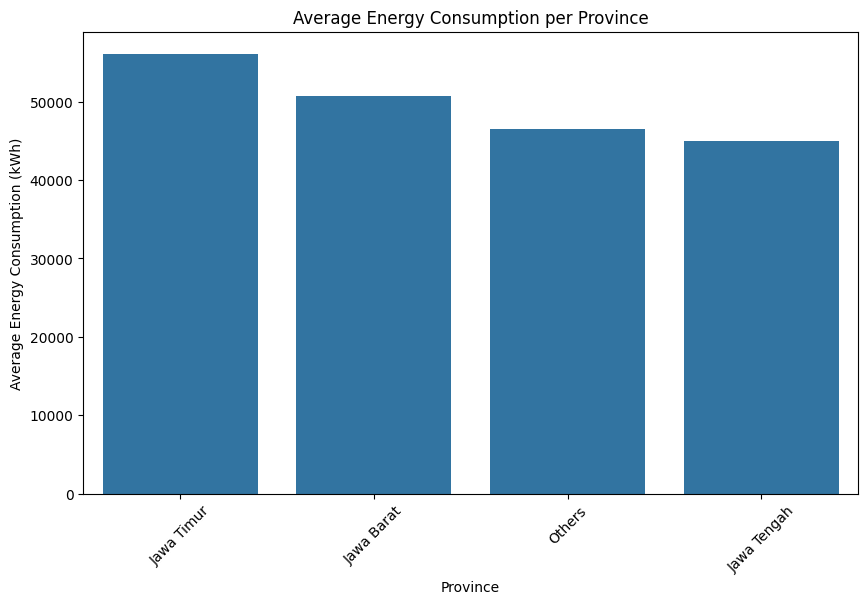

In [30]:
def plotEnergyProvince(df_fixed):
    province_energy_avg = df_fixed.groupby('Province')['Energy_Consumption (kWh)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=province_energy_avg.index, y=province_energy_avg.values)
    plt.title('Average Energy Consumption per Province')
    plt.ylabel('Average Energy Consumption (kWh)')
    plt.xlabel('Province')
    plt.xticks(rotation=45)
    plt.show()

plotEnergyProvince(df_fixed)

East Java (Jawa Timur) stands out for having the highest energy consumption on Java Island. This is mainly due to its strong industrial presence and large population, both of which contribute to high energy demand and production. The region is part of the Java-Bali power grid, one of the largest in Indonesia, which supports much of the country's energy needs, including numerous coal-fired power plants in East Java. The rapid pace of urbanization and industrial expansion, especially in cities like Surabaya and nearby areas, drives this significant energy consumption.

Source: https://www.mdpi.com/2071-1050/16/10/4140

**Energy Consumption per sqm Profile of Each Building Type**

In [31]:
# Creating new column of Energy Consumption per sqm by dividing Energy Consumption with Floor Area
df_fixed['Energy_Consumption_per_sqm'] = df_fixed['Energy_Consumption (kWh)'] / df_fixed['Floor_Area (m²)']

# Group by each category of Building Type with the Energy Consumption per square meter (sqm)
building_type_energy_sqm = df_fixed.groupby('Building_Type')['Energy_Consumption_per_sqm'].mean().sort_values(ascending=False)

print("Average Energy Consumption per sqm for each building type:")
building_type_energy_sqm

Average Energy Consumption per sqm for each building type:


,Energy_Consumption_per_sqm
Building_Type,
Commercial,39.612179
Industrial,33.079392
Residential,24.749410


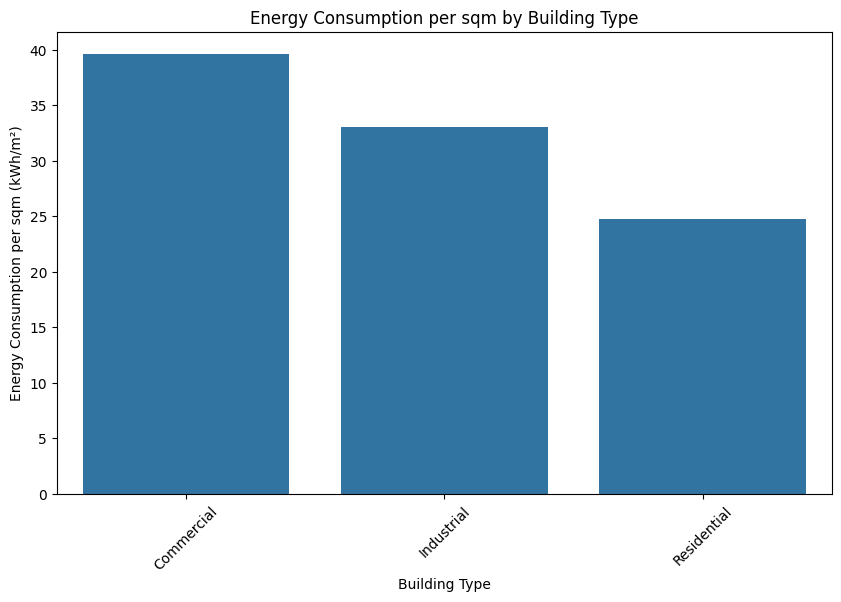

In [32]:
def plotEnergyBuildingType(df_fixed):
    df_fixed['Energy_Consumption_per_sqm'] = df_fixed['Energy_Consumption (kWh)'] / df['Floor_Area (m²)']
    building_type_energy_sqm = df.groupby('Building_Type')['Energy_Consumption_per_sqm'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=building_type_energy_sqm.index, y=building_type_energy_sqm.values)
    plt.title('Energy Consumption per sqm by Building Type')
    plt.ylabel('Energy Consumption per sqm (kWh/m²)')
    plt.xlabel('Building Type')
    plt.xticks(rotation=45)
    plt.show()

plotEnergyBuildingType(df_fixed)

We can see that the commercial building type has the highest energy consumption per square meter (sqm), while the residential building type has the lowest. This makes sense, as commercial and industrial buildings typically use more energy due to higher occupancy and operational demands, whereas residential buildings generally consume less energy, as they accommodate fewer people.

In [33]:
# Calculate the correlation between Average_Temp and Energy_Consumption
correlation = df_fixed['Average_Temp'].corr(df_fixed['Energy_Consumption (kWh)'])
print(f"The correlation between Average Temperature and Energy Consumption is {correlation:.2f}.")

The correlation between Average Temperature and Energy Consumption is -0.66.


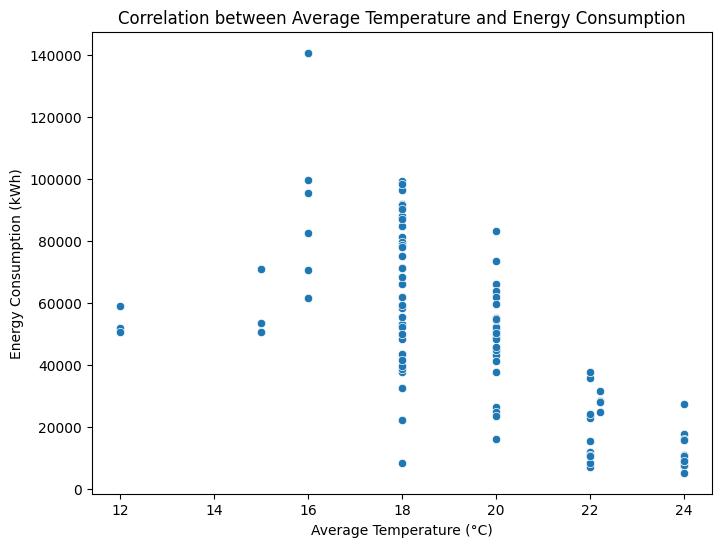

In [34]:
def plotCorr(df_fixed):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Average_Temp', y='Energy_Consumption (kWh)', data=df_fixed)
    plt.title('Correlation between Average Temperature and Energy Consumption')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Energy Consumption (kWh)')
    plt.show()

plotCorr(df_fixed)

We observed that the correlation between average temperature and energy consumption is -0.66, indicating a significant negative correlation (though not a perfect correlation of -1). This suggests an inverse relationship between a building's average temperature and its energy usage. The scatter plot also shows a clear trend: as the temperature increases, energy consumption tends to decrease. This implies that in colder climates, buildings may consume more energy for heating, leading to higher energy consumption at lower temperatures. Conversely, buildings in warmer regions may be designed to be more energy-efficient.

In [35]:
# Calculate the correlation between Average_Temp and Energy_Consumption_per_sqm
correlation = df_fixed['Average_Temp'].corr(df_fixed['Energy_Consumption_per_sqm'])
print(f"The correlation between Average Temperature and Energy Consumption is {correlation:.2f}.")

The correlation between Average Temperature and Energy Consumption is -0.57.


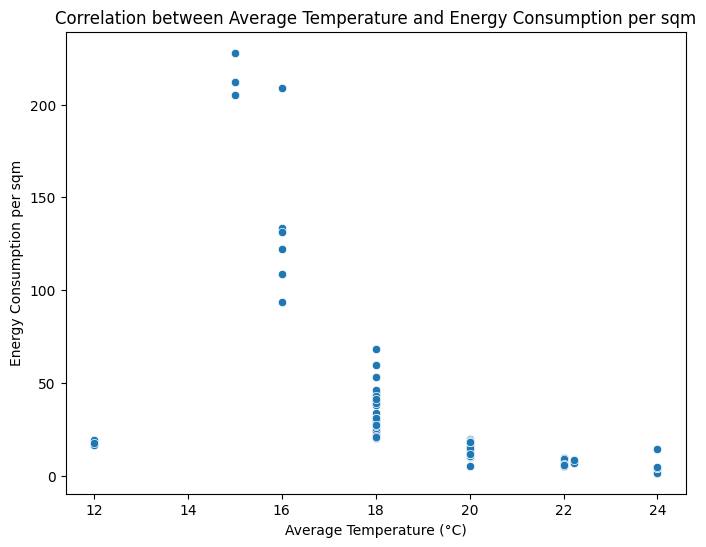

In [36]:
def plotCorrsqm(df_fixed):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Average_Temp', y='Energy_Consumption_per_sqm', data=df_fixed)
    plt.title('Correlation between Average Temperature and Energy Consumption per sqm')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Energy Consumption per sqm')
    plt.show()

plotCorrsqm(df_fixed)

A similar pattern is observed when we compare energy consumption per square meter (sqm), demonstrating a consistent inverse relationship between temperature and energy usage. However, the data point around 12°C does not align with this general trend (where lower temperatures correlate with higher energy consumption) and may be an outlier or an exceptional case. This could be due to external factors that affect energy usage, or it may indicate that the building has adopted more energy-efficient systems.

In [37]:
# Buildings with Average_Temp is 12°C
temp_12c_data = df_fixed[df_fixed['Average_Temp'] == 12]
temp_12c_data[['Building_ID', 'Building_Type', 'Energy_Consumption (kWh)', 'Average_Temp', 'Floor_Area (m²)', 'Occupancy_Rate (%)']]

,Building_ID,Building_Type,Energy_Consumption (kWh),Average_Temp,Floor_Area (m²),Occupancy_Rate (%)
11,12,Residential,51975.0,12.0,2725,81.45
32,33,Industrial,50525.0,12.0,3049,91.32
46,47,Residential,59045.0,12.0,3305,66.43


We can also see that the building type with a temperature of 12°C is the same one where we adjusted the temperature value using the IQR method, as it originally had a temperature of 0°C. These buildings may exhibit exceptional energy efficiency, possibly due to factors like excellent insulation or energy-saving technologies designed to cope with the extreme cold temperatures.

2)
\
  a. The province with the highest average energy consumption is East Java with 56136.23 kWh.

  b. Commercial building type has the highest energy consumption per sqm and the residential building type has the lowest energy consumption per sqm.

  c. We observed that the correlation between average temperature and energy consumption is -0.66, indicating a significant negative correlation (though not a perfect correlation of -1).

# **Dataset Visualization**

**Heatmap of Energy Consumption per Floor Area by Region and
Building Type**

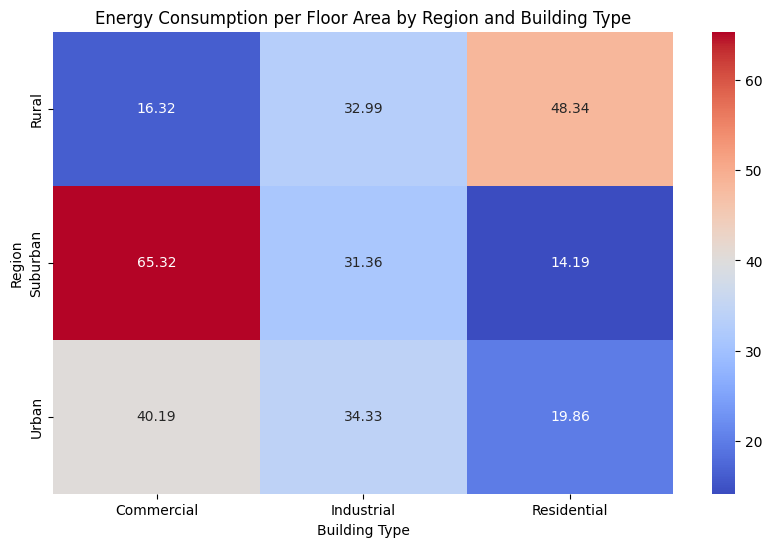

In [38]:
# Heat Map
heatmap_data = df_fixed.pivot_table(values='Energy_Consumption_per_sqm', index='Region', columns='Building_Type', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Energy Consumption per Floor Area by Region and Building Type')
plt.ylabel('Region')
plt.xlabel('Building Type')
plt.show()

Observations:

* Suburban commercial buildings, including hotels, offices, and malls, have the highest energy consumption per square meter, reaching 65.32 kWh/m². This indicates that these buildings use significantly more energy compared to those in rural and urban areas. Contributing factors may include inefficient building designs, outdated infrastructure, and a greater reliance on energy-consuming appliances in suburban commercial spaces. Further analysis reveals that rural areas have fewer commercial buildings and, consequently, lower levels of commercial activity, which likely contributes to their reduced energy consumption. In contrast, urban areas tend to feature more efficient building designs and advanced equipment, resulting in better energy management and lower overall consumption.
* Energy consumption per square meter for industrial buildings is relatively consistent across all regions, ranging from 31.36 kWh/m² to 34.33 kWh/m². This uniformity suggests that industrial buildings, regardless of location, have similar energy demands per square meter, likely due to standardized processes and equipment, a legacy of the Industrial Revolution that shaped modern industry.
* Suburban residential buildings have the lowest energy consumption per square meter at 14.19 kWh/m², which may indicate higher energy efficiency or reduced overall energy needs, possibly due to their location on the outskirts of cities. In contrast, rural residential buildings show the highest consumption at 48.34 kWh/m², potentially due to older homes or increased heating and cooling requirements, where infrastructure may be less modern or efficient. Additionally, rural homes may have larger spaces for activities like small-scale farming, which can contribute to higher energy usage. Urban residential buildings consume 19.86 kWh/m², higher than suburban homes but lower than rural ones, likely benefiting from more modern infrastructure and energy-efficient designs.

**Correlation of Floor Area, Occupancy Rates, and Energy Consumption**

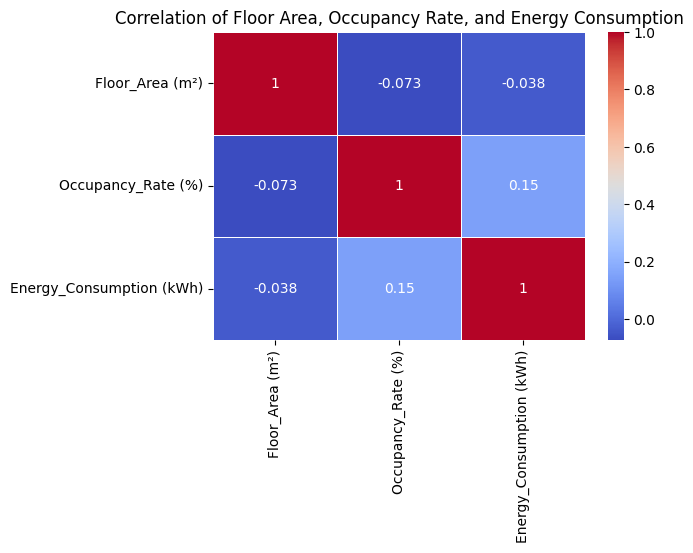

In [39]:
# Correlation Matrix
corr_matrix = df_fixed[['Floor_Area (m²)', 'Occupancy_Rate (%)', 'Energy_Consumption (kWh)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Floor Area, Occupancy Rate, and Energy Consumption')
plt.show()

Observations:

* Floor Area, Occupancy Rate, and Energy Consumption show correlations close to zero, indicating no strong positive or negative relationship between them. This suggests that these variables do not significantly influence one another, meaning changes in one variable are unlikely to directly impact the others.
* Upon further analysis, we can see that among the three variables, Occupancy Rate and Energy Consumption have the highest correlation. This suggests that buildings with higher occupancy rates tend to use slightly more energy, which is logical—more occupants likely increase the usage of lighting, heating, and cooling. However, the relationship is not very strong, indicating that while occupancy has some effect on energy consumption, it is not the dominant factor driving energy usage.

**Energy Consumption Trend by Region and Building Type Over Time**

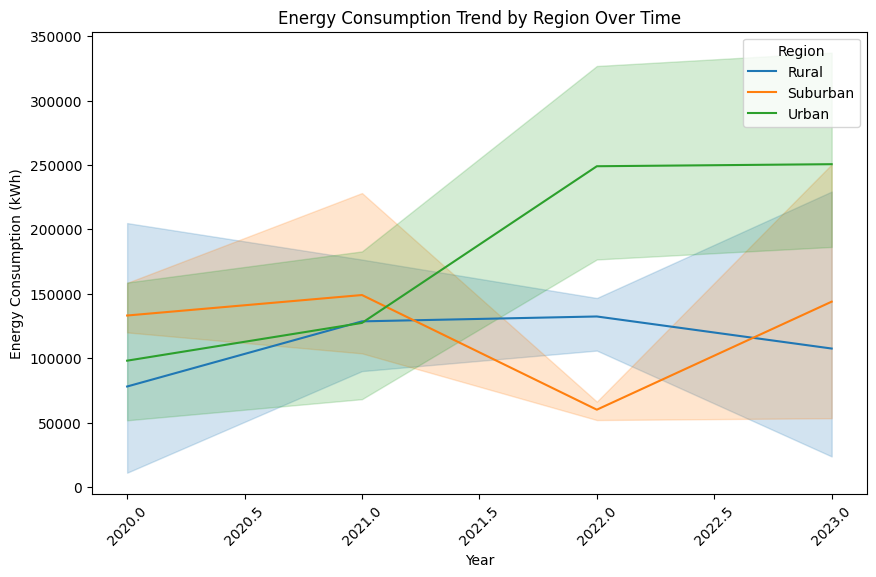

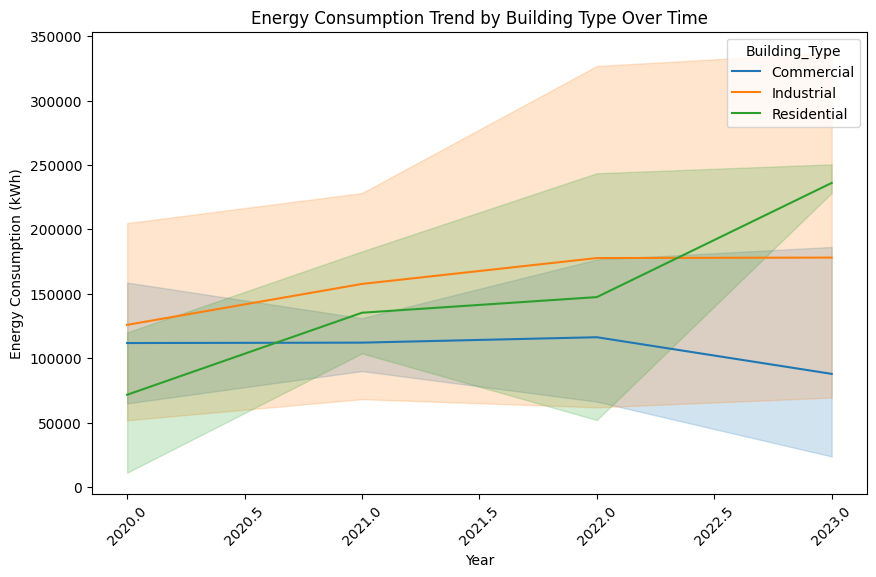

In [40]:
trend_data = df_cleaned1.groupby(['Year', 'Region', 'Building_Type'])['Energy_Consumption (kWh)'].sum().reset_index()

# Energy Consumption Trend by Region Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='Year', y='Energy_Consumption (kWh)', hue='Region', markers=True)
plt.title('Energy Consumption Trend by Region Over Time')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# Energy Consumption Trend by Building Type Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='Year', y='Energy_Consumption (kWh)', hue='Building_Type', markers=True)
plt.title('Energy Consumption Trend by Building Type Over Time')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

Observation for Energy Consumption Trend by Region Over Time:

* Rural areas (represented by the blue line) show a slight but steady increase in energy consumption from 2020 to 2022, with a relatively stable upward trend. However, the variance (indicated by the shaded area) suggests that there are some fluctuations in energy usage across individual rural regions. This aligns with previous observations that industrial buildings, regardless of their location, tend to have similar energy demands per square meter due to standardized processes and equipment—a legacy of the Industrial Revolution that has shaped uniformity in modern industry.
* Suburban areas (represented by the orange line) display a more fluctuating trend, with a noticeable dip in energy consumption around mid-2021, followed by a gradual increase from 2022 onwards, eventually rising again by 2023. This pattern may suggest that residents in suburban areas have not significantly upgraded their systems or appliances over time, leading to inconsistent energy usage. The dip around mid-2021 could also be attributed to the COVID-19 pandemic, which likely resulted in reduced energy demand during that period.
* Urban areas (represented by the green line) show the most significant increase in energy consumption over time. By 2022, they have the highest energy consumption, with a growing gap compared to rural and suburban regions. This trend suggests that urbanization is driving higher energy demands, which makes sense given the dense populations and increased activity in cities, including industries, commercial businesses, and a greater number of residents.

\

Observation for Energy Consumption Trend by Building Type Over Time:

* Energy consumption for commercial buildings (represented by the blue line) remains relatively flat over time, showing little change from 2020 to 2023. This trend may suggest that commercial spaces are reaching a plateau in energy demand, potentially due to improvements in energy efficiency or less energy-intensive business operations. This makes sense, as commercial buildings have been utilizing similar technologies—such as computers, lighting, HVAC systems, and power systems—for decades. The small dip observed could be attributed to the adoption of more efficient technologies, like advanced computer processors and generators.
* Industrial buildings (represented by the orange line) exhibit a gradual increase in energy consumption, although the rate of increase is not as steep as that seen in residential buildings. Industrial energy use remains consistently high, likely due to increased production processes driven by rising demand. The relatively modest increase may also be attributed to standardization within industries, where established practices and equipment lead to a more stable energy demand over time.
* Residential buildings (represented by the green line) show the sharpest increase in energy consumption, surpassing both industrial and commercial buildings by 2022. This rise in energy consumption may be driven by an increasing number of homes or higher energy use per household, particularly for heating, cooling, and electronic devices. Additionally, the trend of people spending more time at home has likely led to greater reliance on energy-intensive appliances, such as computers and other electronics.

**Key Insides for ABC To facilitate Informed Decision-Making**

\

3)
\
a. Focus on Suburban Commercial Buildings:

*  ABC should prioritize energy-saving measures in suburban commercial properties, as these buildings have the highest average energy consumption per square meter compared to industrial and residential types.
*   ABC could consider upgrading residential buildings, particularly in rural areas, with more energy-efficient appliances, power systems, or HVAC systems to address the disproportionately high energy consumption in these homes.
* There may be less need for extensive research or improvements in industrial building types, given their consistent energy use across regions. However, there is an opportunity to introduce more energy-efficient systems and infrastructure, such as power systems and HVAC, within the industrial sector.


b. Based on the correlation of Floor Area, Occupancy Rates, and Energy Consumption:

*  Given the lack of correlation between Floor Area and Energy Consumption, as well as between Floor Area and Occupancy Rate, ABC should focus more on improving energy efficiency rather than solely addressing energy consumption in larger buildings.
*  ABC should also be cautious about prioritizing improvements in Occupancy Rate and Energy Consumption, as there is a weak correlation between these two variables. However, if ABC decides to pursue this approach, it may be worthwhile since Occupancy Rate shows a stronger correlation with Energy Consumption than Floor Area. ABC could implement better building management strategies to reduce energy usage in buildings with higher occupancy rates.
* To gain deeper insights, ABC may need to consider other variables such as building type, age, region, energy costs, and existing energy efficiency measures. Additionally, energy consumption may be significantly influenced by the efficiency of the systems and infrastructure within the buildings, rather than being determined solely by occupancy or size.

c. Based on Energy Consumption Trend by Region and Building Type Over Time, we can conclude that:

*  Urban areas are experiencing a steady increase in energy consumption over time, largely driven by the higher concentration of residential, commercial, and industrial buildings. This rise is likely due to increasing urbanization, energy-intensive activities (e.g., commercial development), and higher population densities. The combined trend suggests that urban regions, especially residential buildings, are significantly contributing to the overall energy consumption increase. ABC should prioritize improving energy efficiency in urban residential areas to help manage future energy demand growth.
*  The relatively stable energy consumption in commercial buildings suggests improved energy efficiency or stabilized energy demands in commercial activities. However, ABC should continue focusing on energy efficiency improvements, as commercial buildings, despite having the lowest overall energy usage, still exhibit the highest average energy consumption per square meter. Meanwhile, residential buildings show a significant upward trend in energy consumption, now accounting for the highest overall usage. This increase is largely driven by growing populations and increased appliance usage, even though residential buildings have the lowest average energy consumption per square meter, likely due to the use of more energy-efficient systems, infrastructures, and appliances. Nonetheless, ABC should still prioritize further efficiency upgrades to manage the rising energy demands in residential areas.




# **Thoughts and Experiences from Working on the Exercise**

In this exercise, I encountered a few key challenges that I tackled, including:


*   Handling uncleaned data: The "Average Temperature" column contained symbols and units that needed to be removed for proper analysis, and the "Province" column had inconsistent formatting of province names, requiring cleaning and standardization.
*   Outlier treatment: Deciding how to approach outlier replacement presented a challenge, as I had to evaluate different methods to address the anomalies without compromising the integrity of the data.
*   Complex analysis: The analysis required more than just drawing conclusions from the data; it was necessary to relate findings to real-life sectors, such as energy consumption trends in different regions and building types, and explore external sources for validation.

Despite these challenges, I gained valuable insights into uncovering hidden patterns in the raw data using data visualization, enabling more informed conclusions.
